### Sharon Lynch Grey
### Rob Taylor is my programming partner. We help eachother with issues, but do not share code.

# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [207]:
diabetes = pd.read_csv('diabetes.csv')

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [208]:
diabetes.info()
print()
diabetes.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [209]:
diabetes = diabetes.drop('Pregnancies', axis=1)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [210]:
diabetes.info()
print()
diabetes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB



(768, 8)

Step 5 - Write code to clean data

In [211]:
# check for min/max values from each column to see range
diabetes_max = diabetes.max(axis=0, numeric_only=True)
diabetes_min = diabetes.min(axis=0, numeric_only=True)
pd.DataFrame({'max':diabetes_max, 'min':diabetes_min})

,max,min
Glucose,199.000,0.000
BloodPressure,122.000,0.000
SkinThickness,99.000,0.000
Insulin,846.000,0.000
BMI,67.100,0.000
DiabetesPedigreeFunction,2.420,0.078
Age,81.000,21.000
Outcome,1.000,0.000


In [212]:
# investigate dropping rows with multiple zero values as lack of data can skew results
# count the number of zeros in each row aside from the outcome column
diabetes_no_outcome = diabetes.drop(columns=['Outcome'])
zero_row_counts = (diabetes_no_outcome == 0).sum(axis=1)

# return count of rows with each count of zeros
zero_counts_summary = zero_row_counts.value_counts().sort_index(ascending=False)
zero_counts_summary

4      7
3     28
2    199
1    142
0    392
Name: count, dtype: int64

In [213]:
# investigate columns to see if any are missing a lot of values (shown as 0) 
# check for number of zeros in each column and percentage of df
zero_counts = (diabetes_no_outcome == 0).sum()
zero_percent = (zero_counts/len(diabetes)) * 100
pd.DataFrame({'count': zero_counts, 'percent': zero_percent}).sort_values(by='percent', ascending=False)

,count,percent
Insulin,374,48.698
SkinThickness,227,29.557
BloodPressure,35,4.557
BMI,11,1.432
Glucose,5,0.651
DiabetesPedigreeFunction,0,0.000
Age,0,0.000


In [214]:
# drop SkinThickness and insulin from original dataframe
# SkinThickness is probably covered by BMI
# Insulin has too high a zero percentage to be helpful in predictions
diabetes_clean = diabetes.drop(columns=['Insulin', 'SkinThickness'])

In [215]:
# check shape of new df to confirm nothing went wrong
diabetes_clean.shape

(768, 6)

In [216]:
# check for number of zeros in each column and percentage of df again
zero_counts = (diabetes_clean == 0).sum()
zero_percent = (zero_counts/len(diabetes_clean)) * 100
pd.DataFrame({'count': zero_counts, 'percent': zero_percent}).sort_values(by='percent', ascending=False)

,count,percent
Outcome,500,65.104
BloodPressure,35,4.557
BMI,11,1.432
Glucose,5,0.651
DiabetesPedigreeFunction,0,0.000
Age,0,0.000


In [217]:
# check again for rows with multiple zero values
# count the number of zeros in each row aside from the outcome column
diabetes_no_outcome = diabetes_clean.drop(columns=['Outcome'])
zero_row_counts = (diabetes_no_outcome == 0).sum(axis=1)

# return count of rows with each count of zeros
zero_counts_summary = zero_row_counts.value_counts().sort_index(ascending=False)
zero_counts_summary

2      7
1     37
0    724
Name: count, dtype: int64

In [218]:
# check min/max values after cleaning
diabetes_clean_max = diabetes_clean.max(axis=0, numeric_only=True)
diabetes_clean_min = diabetes_clean.min(axis=0, numeric_only=True)
pd.DataFrame({'max':diabetes_clean_max, 'min':diabetes_clean_min})

,max,min
Glucose,199.000,0.000
BloodPressure,122.000,0.000
BMI,67.100,0.000
DiabetesPedigreeFunction,2.420,0.078
Age,81.000,21.000
Outcome,1.000,0.000


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

#### **Step #7: Initialize your model**




In [220]:
# initialize model using Guassian Naive Bayes
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [233]:
# fit the model
model.fit(X_train, y_train)

GaussianNB()

Step 9 - Predict using model on test data

In [224]:
# store predicted target variables from test data in y_pred
y_pred = model.predict(X_test)

In [225]:
# calculate probabilities
pred_probability = model.predict_proba(X_test)

# print first 10 predictions
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [226]:
# print probabilities of first 10 for class 0 (No Diabetes)
for i in range(0, 10):
    print(pred_probability[i][0], end="\n")

0.57722072163645
0.776848491747372
0.944516950989854
0.9266492698747905
0.8177582527038116
0.8267233528508561
0.7928967028709996
0.9412598994638578
0.8834536977341544
0.866902533062507


In [227]:
# print probabilities of first 10 for class 1 (Diabetes)
for i in range(0, 10):
    print(pred_probability[i][1], end="\n")

0.42277927836354884
0.22315150825262642
0.055483049010145516
0.07335073012521137
0.18224174729618858
0.17327664714914456
0.20710329712899986
0.05874010053614288
0.11654630226584553
0.13309746693749375


Step 10 -  Find accuracy of model

In [228]:
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [229]:
# find precision, recall, and F1 score for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        99
           1       0.77      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



Step 11 - Confusion Matrix

In [231]:
# evaluate using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[89, 10],
       [22, 33]], dtype=int64)

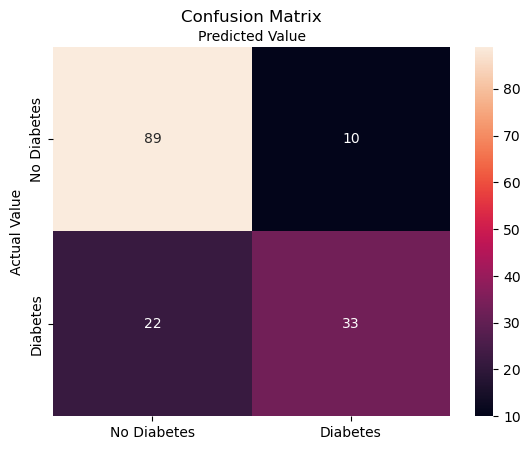

In [232]:
# heatmap for confusion matrix
# set custom labels for classes 0 = No Diabetes, 1 = Diabetes
class_names = ['No Diabetes', 'Diabetes']

# create figure and set of subplots
fig, ax = plt.subplots()

# create tick positions equal to number of classes
tick_marks = np.arange(len(class_names))

# set ticks on x and y axis to custom class names
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create datafram from confusion matrix setting the index and columns to defined class names
diabetes_cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# create heatmap with annotations
sns.heatmap(diabetes_cm_df, annot=True, ax=ax, fmt='g')

# move X label to top of matrix
ax.xaxis.set_label_position('top')

plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

plt.show()